# **Introdução à Complexidade de Tempo**

# Importações

In [ ]:
import time
import random
import matplotlib.pyplot as plt
import re

# **Measuring the Execution Time e Generating Random Inputs**

- vamos mergulhar no processo de avaliação do tempo de execução de uma função Python.
- objetivo é analisar o algoritmo em si e prever como seu tempo de execução irá se escalar com conjuntos de dados maiores.
- Usando a função time.time(), podemos medir o tempo que uma função Python leva para executar calculando a diferença entre o tempo logo após a função terminar de executar e o tempo logo antes dela começar a executar
- queremos ser capazes de gerar entradas de comprimentos de 1 a 500, é conveniente definir uma função que recebe como entrada um comprimento e produz uma lista aleatória do comprimento dado

In [ ]:
def maximum(values):
   answer = None
   for value in values:
    if answer == None or answer < value:
      answer = value
   return answer

def gen_input(length):
    return [random.randint(-1000, 1000) for _ in range(length)]

times = []

for length in range(1, 501):

  values = gen_input(length)
  start = time.time() #tempo inicial

  maximum(values) # Chamando a função maximum() na lista gerada,ou seja, a função maximum() é executada na lista de valores gerados.

  end = time.time() #tempo final
  runtime = end - start #tempo de execução.  Final - inicial
  times.append(runtime)

print("Tempo de execução: ", times, "segundos") #Aqui podemos verificar o aumento no tempo à medida que o comprimento da lista aumenta.

Tempo de execução:  [2.1457672119140625e-06, 1.430511474609375e-06, 1.1920928955078125e-06, 9.5367431640625e-07, 1.430511474609375e-06, 1.430511474609375e-06, 1.6689300537109375e-06, 1.6689300537109375e-06, 1.6689300537109375e-06, 1.6689300537109375e-06, 1.6689300537109375e-06, 1.9073486328125e-06, 2.384185791015625e-06, 2.384185791015625e-06, 2.6226043701171875e-06, 2.1457672119140625e-06, 2.1457672119140625e-06, 2.86102294921875e-06, 3.0994415283203125e-06, 2.86102294921875e-06, 2.86102294921875e-06, 2.6226043701171875e-06, 3.5762786865234375e-06, 3.0994415283203125e-06, 3.0994415283203125e-06, 3.814697265625e-06, 3.337860107421875e-06, 3.814697265625e-06, 4.5299530029296875e-06, 4.291534423828125e-06, 4.76837158203125e-06, 4.76837158203125e-06, 5.245208740234375e-06, 5.7220458984375e-06, 5.245208740234375e-06, 5.4836273193359375e-06, 5.245208740234375e-06, 0.010558366775512695, 8.106231689453125e-06, 6.4373016357421875e-06, 5.4836273193359375e-06, 6.4373016357421875e-06, 5.722045898

# **Modeling Execution Times**
Adiconando as Funções Sum_values() e plot_times()

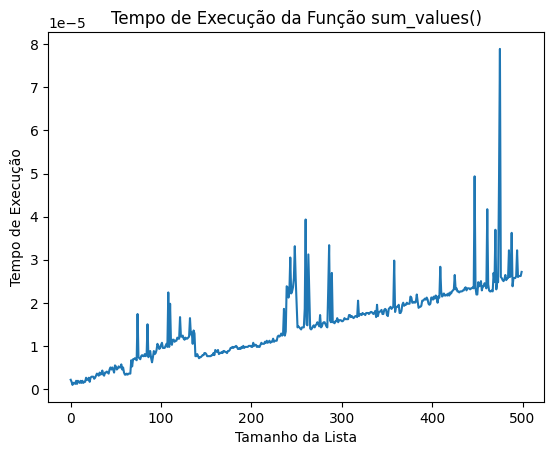

In [ ]:
# é responsável por plotar um gráfico dos tempos de execução em relação ao tamanho da lista
def plot_times(times):
    plt.plot(times)
    plt.ylabel('Tempo de Execução')
    plt.xlabel('Tamanho da Lista')
    plt.title('Tempo de Execução da Função sum_values()')
    plt.show()

#É criado essa função para calcular a soma de todos os valores de uma lista
def sum_values(values): # Ela ira receber uma lista como argumento
    total = 0
    #Usa o loop para interar cada valor na lista
    for value in values:
        total += value
    return total #retorna o total

def gen_input(length):
    return [random.randint(-1000, 1000) for _ in range(length)]

times = []

for length in range(1, 501):
  values = gen_input(length)

  start = time.time()
  sum_values(values) #Chamando a função sum_values() na lista gerada

  end = time.time()
  runtime = end - start
  times.append(runtime)

plot_times(times)


# **Worst-Case Analysis**

-  foi solicitado a analisar o tempo de execução no pior caso de uma função count_zeros().
- Para isso,precisou contar quantas vezes cada linha da função era executada em função do comprimento N da lista de valores fornecida

outra respota

In [ ]:
def count_zeros(values):
    count = 0            # c1, 1 time, c1
    for value in values: # c2, N times, c2*N
        if value == 0:   # c3, N times, c3*N
            count += 1   # c4, N times, c4*N
    return count         # c5, 1 time, c5

model1 = '(c1 + c2) * N + (c3 + c4 + c5)'
model2 = '(c2 + c3) * N + (c1 + c4 + c5)'
model3 = '(c2 + c3 + c4) * N + (c1 + c5)'

correct = model3

# **Quadratic Complexity**

- todas as funções concretas que analisamos tinham um modelo de tempo de execução que era linear.
- essa atividade é para analisar o tempo de execução no pior caso da função sum_pairs(), função essa que calcula a soma de todos os pares de valores em uma lista fornecida.
- Então para cada função, contamos quantas vezes cada linha de código seria executada em função do tamanho N da entrada. Multiplicamos esses valores pelas constantes associadas a cada linha e somamos tudo para obter uma expressão para o tempo de execução no pior caso em função de N.

In [ ]:
def sum_pairs(values):
    pair_sums = 0              # c1, 1 time,      c1
    for x in values:           # c2, N times,     c2 * N
        for y in values:       # c3, N * N times, c3 * N^2
            pair_sums += x + y # c4, N * N times, c4 * N^2
    return pair_sums           # c5, 1 time,      c5

model1 = '(c3 + c4) * N^2 + c2 * N + (c1 + c5)'
model2 = 'c4 * N^2 + (c2 + c3) * N + (c1 + c5)'
model3 = '(c2 + c3 + c4) * N^2 + (c1 + c5)'

correct = model1

# **Simplifying Further**

- Nesta tarefa, analisamos três funções para determinar a ordem do tempo de execução de cada uma. A ordem do tempo de execução de uma função representa como o tempo de execução da função aumenta com o tamanho da entrada. Para cada função, foi fornecida uma expressão que descreve o número de execuções de linha em termos do tamanho da entrada. Com base nessas expressões, determinamos a ordem de cada função e atribuímos as respostas às variáveis O1, O2 e O3.

In [ ]:
time1 = 'N^4 + N^2 + 1'
time2 = '7 * N^3 + 0.5 * N^2 + 100'
time3 = 'N^2 + 10000 * N + 999'

O1 = 'O(N^4)'
O2 = 'O(N^3)'
O3 = 'O(N^2)'

# **A Common Misconception**

- Nesta atividade, analisamos a complexidade de tempo da função `count_triples()`. Para isso, contamos quantas vezes cada linha da função é executada no pior caso. Em seguida, somamos esses valores para obter uma expressão para o tempo de execução em função do tamanho da lista de entrada, denotado por N. Finalmente, identificamos os coeficientes constantes dos termos de tempo(N) do maior para o menor e determinamos a ordem da função, que representa como seu tempo de execução aumenta com o tamanho da entrada.

In [ ]:
def count_triples(values):
    count = 0                                               # c1, 1 time,          c1
    N = len(values)                                         # c2, 1 time,          c2
    for i in range(N):                                      # c3, N times,         c3 * N
        for j in range(N):                                  # c4, N * N times,     c4 * N^2
            for k in range(N):                              # c5, N * N * N times, c5 * N^3
                if values[i] + values[j] + values[k] == 0:  # c6, N * N * N times, c6 * N^3
                    count += 1                              # c7, N * N * N times, c7 * N^3
    return count                                            # c8, 1 time,          c8
              #3* N^3, N , N^2, (C1+ C2 +C8)
coefficients = [3,1,1,3]
order = 'O(N^3)'

#**Constant time complexity**




segunda parte

- Nesta atividade, analisamos a complexidade de tempo de uma função que calcula o valor médio de uma lista. Para isso, contamos quantas vezes cada linha da função é executada no pior caso e somamos esses valores para obter uma expressão para o tempo de execução em função do comprimento da lista de entrada, denotado por N. Em seguida, identificamos os coeficientes constantes dos termos de tempo(N) do maior para o menor e determinamos a ordem da função, que representa como seu tempo de execução aumenta com o tamanho da entrada.

In [ ]:
def average(values):
    average = 0                   # c1, 1 time, c1
    for value in values:          # c2, N times, c2 * N
        average += value          # c3, N times, c3 * N
    return average / len(values)  # c4, 1 time, c4

# 2N + 2

coefficients = [2, 2]
order = 'O(N)'

# **Constant Time Complexity in Python**

- Nesta atividade, analisamos três funções para determinar se elas têm complexidade de tempo constante (O(1)). Para cada função, verificamos se o número de operações executadas não depende do tamanho da entrada. Com base nessa análise, atribuímos um valor booleano (True ou False) a três variáveis (constant1, constant2 e constant3) para indicar se cada função tem complexidade de tempo constante ou não.

In [ ]:
def function1(N):
    for i in range(N):
        print(i)

def function2():
    for i in range(100000):
        print(i)

def function3(N):
    for i in range(100000):
        print(i)

constant1 = False
constant2 = True
constant3 = True

# **Complexity of Function Calls**

- Nesta atividade, analisamos a complexidade de tempo de três funções: sum_values(), num_values() e average(). Primeiramente, realizamos uma análise da complexidade de tempo da função sum_values(), que percorre uma lista de valores e calcula a soma desses valores. Em seguida, analisamos a função num_values(), que conta o número de elementos em uma lista. Utilizando as análises das duas funções anteriores, realizamos uma análise da complexidade de tempo da função average(), que calcula a média de uma lista de valores, usando os resultados das funções sum_values() e num_values().

In [ ]:
def sum_values(values):
    total = 0            # 1
    for value in values: # N
        total += value   # N
    return total         # 1

def num_values(values):
    total = 0            # 1
    for _ in values:     # N
        total += 1       # N
    return total         # 1

def average(values):
    value_sum = sum_values(values)  # N
    num_values = num_values(values) # N
    return value_sum / num_values   # 1

# **Hidden Function Calls**

- Nesta atividade, analisamos a complexidade de tempo de seis listas criadas usando compreensões de lista. Para cada lista, identificamos a complexidade correta de criação em relação ao tamanho das listas de entrada, representado por N e M. A complexidade de tempo foi avaliada em relação a cinco possíveis complexidades diferentes. Cada lista foi analisada individualmente para determinar a complexidade correta de sua criação.

In [2]:
N = 10
M = 20

list1 = [_ for i in range(0)]
list2 = [i for i in range(3)]
list3 = [i * i for i in range(M)]
list4 = [[i + j for j in range(M)] for i in range(N)]
list5 = [min(list4[i]) for i in range(N)]
list6 = [i for i in range(1000)]

complexity1 = 'O(1)'
complexity2 = 'O(N)'
complexity3 = 'O(M)'
complexity4 = 'O(N + M)'
complexity5 = 'O(N * M)'

# Example answer for list1
answer1 = complexity1
answer2 = complexity1
answer3 = complexity3
answer4 = complexity5
answer5 = complexity5
answer6 = complexity1

# **Amortized Analysis of Append**

- Nesta atividade, realizamos um experimento para avaliar o crescimento dos custos de uma função `append_N_list_cost()` em relação a uma faixa de valores de N. Inicializamos uma lista vazia chamada `custos` e, em seguida, iteramos sobre uma faixa de valores de N usando um loop `for`. Para cada valor de N, chamamos a função `append_N_list_cost()` com o valor atual de N como argumento e atribuímos o resultado a uma variável chamada `custo`. Em seguida, adicionamos esse custo à lista `custos`. Por fim, utilizamos a função `plot_costs()` para plotar os resultados e analisar o crescimento dos custos em relação a N.

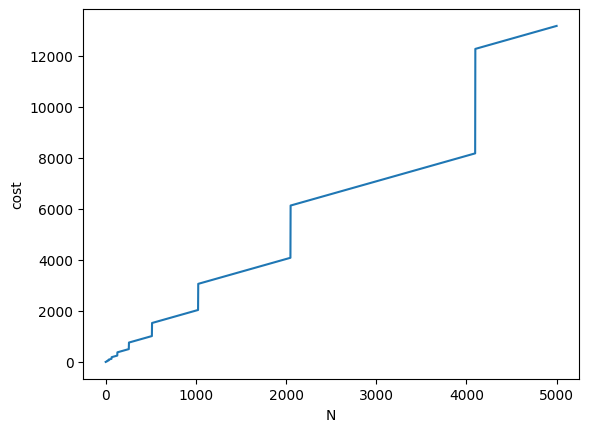

In [1]:
import matplotlib.pyplot as plt

def plot_costs(times):
    plt.plot(times, label='append cost')
    plt.ylabel('cost')
    plt.xlabel('N')
    plt.show()

def append_cost(array_length, list_length):
    if array_length == list_length:
        return array_length
    return 1

def append_N_list_cost(N):
    array_length = 1 # initially the array will have length 1
    list_length = 0 # initially the list has 0 elements
    total_cost = 0 # this variable will keep track of the total cost
    for i in range(N):
        total_cost = append_cost(array_length, list_length)
        total_cost += cost
        # update the array and list lengths
        if array_length == list_length:
            array_length *= 2
        list_length += 1
    return total_cost

# add you code below
costs = []

for N in range(5000):
  cost = append_N_list_cost(N)
  costs.append(cost)

plot_costs(costs)

#**List Complexities**

- Nesta atividade, cronometramos duas funções, add_with_append() e add_with_insert(), para comparar a eficiência entre adicionar elementos a uma lista usando list.append() e list.insert(). Usamos o módulo time para medir o tempo de execução de cada função com uma entrada de 50000 elementos. O objetivo foi observar que a adição com append() é muito mais eficiente do que com insert().

In [3]:
import time

def add_with_append(N):
    values = []
    for i in range(N):
        values.append(i)
    return values

def add_with_insert(N):
    values = []
    for i in range(N):
        values.insert(0, i)
    return values

# write code below
start1 = time.time()
add_with_append(50000)
end1 = time.time()
time_append = end1 - start1
print(f'Time append: {time_append}')

start2 = time.time()
add_with_insert(50000)
end2 = time.time()
time_insert = end2 - start2
print(f'Time insert: {time_insert}')

Time append: 0.02496957778930664
Time insert: 2.2929158210754395


# **Arithmetic Operations**

- Neste experimento, medimos o tempo necessário para multiplicar cada par de inteiros em uma lista chamada `pairs`, onde os inteiros têm um número crescente de dígitos. Usamos a função `time.time()` para medir o tempo antes e depois da multiplicação de cada par e adicionamos o tempo decorrido a uma lista chamada `times`. Por fim, utilizamos a função `plot_times()` para plotar os tempos e observar que eles estão aumentando à medida que os inteiros têm mais dígitos.

In [4]:
import random

def generate_list(k):
    items = []
    count = 1
    while len(items) < k:
        for _ in range(count):
            num1 = random.randint(10**(count-1), 10**count-1)
            num2 = random.randint(10**(count-1), 10**count-1)
            items.append((num1, num2))
            count += 1
            if len(items) == 5000:
                break
    return items

pairs = generate_list(5000)

[(8, 8), (84, 34), (585, 225), (4418, 6451), (86984, 51565)]


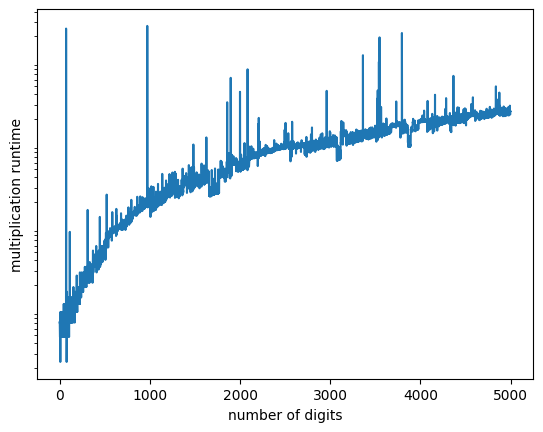

In [5]:
import matplotlib.pyplot as plt
import time

def plot_times(times):
    plt.plot(times)
    plt.ylabel('multiplication runtime')
    plt.xlabel('number of digits')
    plt.yscale('log')
    plt.yticks([])
    plt.show()

print(pairs[:5])
# write code below

times = []

for pair in pairs:
    start_time = time.time()
    result = pair[0] * pair[1]
    end_time = time.time()
    times.append(end_time - start_time)

plot_times(times)

# **String Concatenation**

- Neste experimento, medimos o tempo de execução de duas funções, `concat_with_add()` e `concat_with_join()`, que concatenam strings. Utilizamos a lista `random_strings` contendo strings geradas aleatoriamente como entrada para ambas as funções. Para cada função, calculamos o tempo antes e depois da execução da função e calculamos o tempo de execução subtraindo esses valores. Por fim, comparamos os tempos de execução das duas funções para observar qual delas foi mais rápida.

In [6]:
import random
import string

def generate_list(k):
    result = []
    for _ in range(k):
        string_length = 10
        random_string = ''.join(random.choices(string.ascii_letters + string.digits, k=string_length))
        result.append(random_string)
    return result

k = 100000  # Define the number of positions in the list
random_strings = generate_list(k)

In [7]:
import time

def concat_with_add(word_list):
    concat = ''
    for word in word_list:
        concat += word
    return concat

def concat_with_join(word_list):
    return ''.join(word_list)

print(random_strings[:5])

# write code below

start = time.time()
concat_with_add(random_strings)
end = time.time()
time_add = end - start

start = time.time()
concat_with_join(random_strings)
end = time.time()
time_join = end - start

print("Tempo para concat_with_add:", time_add)
print("Tempo para concat_with_join:", time_join)

['tFiOWOSSwy', 'ZGuFTm0y3G', 'iZi4D6qpMu', 'x8z8tZhNxU', 'nJlvGsdxdY']
Tempo para concat_with_add: 0.01663994789123535
Tempo para concat_with_join: 0.0023102760314941406


# **Hidden Python Optimizations**

- Neste experimento, descomentamos um código que realiza a concatenação de strings usando o operador de adição (`+`) em uma função chamada `concat_with_add()`. Dentro do loop dessa função, adicionamos uma linha para criar uma variável temporária `temp` e atribuir a ela o valor de `concat` a cada iteração. Executamos o experimento para observar como essa mudança afeta o tempo de execução da função, comparando-o com a função original.

In [8]:
import time

def concat_with_add(word_list):
   concat = ''
   for word in word_list:
       concat += word
       temp = concat
   return concat

def concat_with_join(word_list):
   return ''.join(word_list)

start = time.time()
concat_with_add(random_strings)
end = time.time()
time_add = end - start

start = time.time()
concat_with_join(random_strings)
end = time.time()
time_join = end - start

print(time_add)
print(time_join)

3.7041311264038086
0.0021240711212158203
